# Parametrically Changing the number of hidden Units

- ### Debemos usar el dataset de `flores iris`

- ### Crearemos un modelo (con 1 capa oculta) de clasificación multi output donde iremos `cambiando paramétricamente el número de nodos ocultos de 1 a 128`

- ### Graficaremos la precisión en función del número de nodos de dicha capa oculta

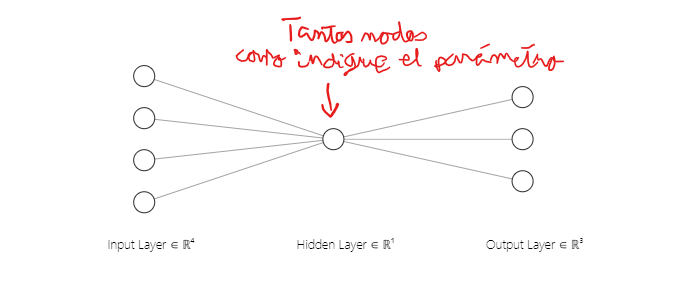

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use("dark_background")

## Cargamos los datos

In [2]:
import seaborn as sns

df_iris = sns.load_dataset("iris")

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Transformando los datos a tensores de `PyTorch`

In [4]:
df_iris.iloc[:,0:4].head() #serán nuestras características, X
# sns.pairplot(df_iris)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df_iris.iloc[:,-1]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [3]:
from sklearn.preprocessing import LabelEncoder
#transformamos las etiquetas (y) de los datos a ser números desde 0 a n_clases-1
label_enc = LabelEncoder()

labels = label_enc.fit_transform(df_iris.species)

In [4]:
X = torch.tensor(df_iris.iloc[:,0:4].values).float() #matriz de características
y = torch.tensor(labels).long() #vector de las etiquetas transformadas a números (tipo de dato long() -> entero) #podiamos tambien haber hecho df.iris[df.iris.species=="setosa"] == 1 y así

## Definiendo la función para crear el modelo en base al número de nodos ocultos

In [5]:
def build_model(hidden_units):
    
    
    model = nn.Sequential(

        nn.Linear(X.shape[1], hidden_units), #capa de entrada que tomará n nodos ocultos definidos por hidden_units
        nn.ReLU(),
        nn.Linear(hidden_units,len(y.unique())) #capa de salida   
        #la función de pérdida CrossEntropyLoss() implementa en la misma clase la función Softmax de salida
)
    
    loss_func = nn.CrossEntropyLoss() #ver docs (usa LogSoftmax debido a la propiedad de los logaritmos de hacer los números pequeños "más espaciados")
    #por lo que añade el logaritmo a la función softmax

    learning_rate = 0.01

    optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    return model, loss_func, optim

## Función que ejcutará el modelo en cada experimento

In [6]:
def train_model(model):
    
    for epoch in range(n_epochs): #tqdm

        #forward pass
        y_hat = model(X)

        #compute error
        loss = loss_func(y_hat, y)

        #backward pass
        optim.zero_grad() #clear previous gradients cache
        loss.backward() #compute gradients based on the error
        optim.step() #update parameters
    

    # #"final forward pass" - post entrenamiento
    preds = model(X)
    preds_labels = torch.argmax(preds, axis=1)
    total_acc = 100*torch.mean((preds_labels == y).float())
    return total_acc

## Hora del Experimento!

In [22]:
n_epochs = 150

hidden_units = np.arange(1, 128, 1) #generar el vector de 128 unidades
accuracies = []


for n_units in hidden_units:
    
    #crear modelo
    model, loss_func, optim = build_model(n_units)
    
    #entrenar el modelo
    acc = train_model(model)
    
    #almacenar precisión post entrenamiento de cada modelo con n unidades ocultas
    accuracies.append(acc)

## Graficar las precisiones post-entrenamiento de cada modelo en base al número de unidades ocultas

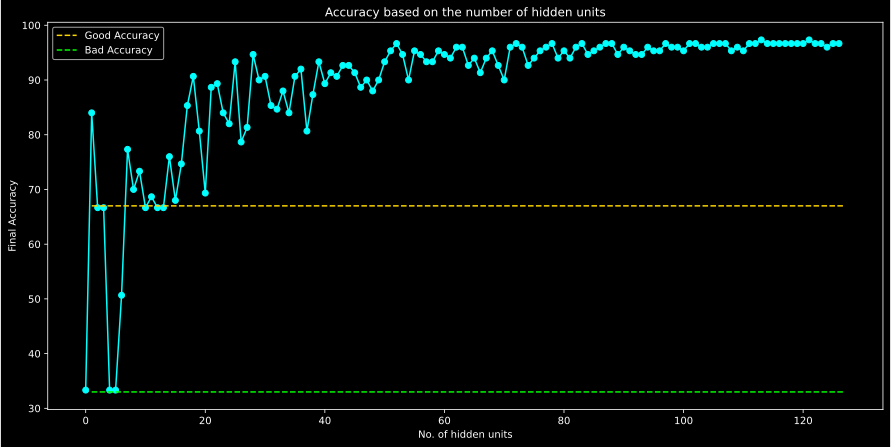

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))

ax.set_title("Accuracy based on the number of hidden units")
ax.plot(accuracies, "o-", color="cyan");
ax.plot(hidden_units[[0,-1]], [67,67], "--", color="gold", label="Good Accuracy")
ax.plot(hidden_units[[0,-1]], [33,33], "--", color="lime", label="Bad Accuracy")
ax.set_xlabel("No. of hidden units");
ax.set_ylabel("Final Accuracy");
ax.legend();

### Dentro de la gráfica, apreciamos 2 zonas discontinuas que dividen la gráfica:

- ### Modelos cuyo número de nodos en la capa oculta les llevó a un mal resultado (precisión<33% acertaron menos de un 1/3 de los datos) -> color lima
> ### *(aquellos modelos que tan no consiguieron clasificar correctamente 2 de las 3 categorías)*

- ### Modelos cuyo número de nodos en la capa oculta les llevó a un buen resultado (precisión>67% acertaron más de 2/3 de los datos) -> color amarillo
> ### *(aquellos modelos que tan solo tuvieron algo más de trabajo en clasificar una de las categorías)*

___________

- ### Por tanto, vemos que modelos con alrededor de 1 a 5 nodos, no consiguen un buen resultado en general, ya que no tienen la complejidad suficiente para identificar los patrones de estos datos


- ### Conforme aumentamos la complejidad del modelo, (nº de unidades), comienza a ir mejorando su precisión en general, permitiéndole al modelo capturar a través de sus funciones no lineales, los patrones más complejos del modelo.

> ### De 5 a 10 nodos, obtienen una precisión "considerable"

> ### A partir de dichos valores de nodos, comienzan a tener una precisión mucho más estable y alta cercana al 100%

___

## Additional Explorations C:\Users\pablo\Mi unidad\Neural Networks\resources\courses\Udemy\A deep understanding of deep learning (with Python intro) - Mike X Cohen\code\ANN\DUDL_ANN_nHiddenUnits.ipynb

1) The results here show that models with fewer than ~50 hidden units have lackluster performance. Would these models 
   eventually learn if they were given more training epochs? Try this by re-running the experiment using 500 epochs.
   Tip: Copy/paste the plotting code into a new cell to keep both plots. Or, take screenshots of the plots.


In [49]:
n_epochs = 500

hidden_units = np.arange(1, 128, 1) #generar el vector de 128 unidades
accuracies = []


for n_units in hidden_units:
    
    #crear modelo
    model, loss_func, optim = build_model(n_units)
    
    #entrenar el modelo
    acc = train_model(model)
    
    #almacenar precisión post entrenamiento de cada modelo con n unidades ocultas
    accuracies.append(acc)

## Graficar las precisiones post-entrenamiento de cada modelo en base al número de unidades ocultas

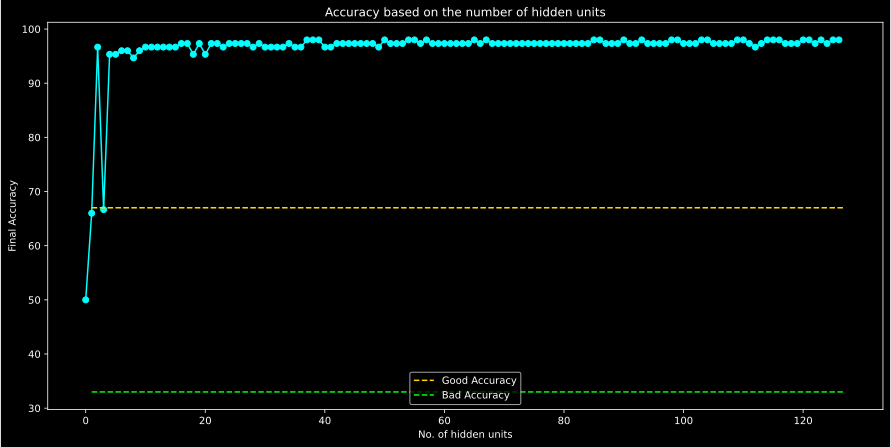

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))

ax.set_title("Accuracy based on the number of hidden units")
ax.plot(accuracies, "o-", color="cyan");
ax.plot(hidden_units[[0,-1]], [67,67], "--", color="gold", label="Good Accuracy")
ax.plot(hidden_units[[0,-1]], [33,33], "--", color="lime", label="Bad Accuracy")
ax.set_xlabel("No. of hidden units");
ax.set_ylabel("Final Accuracy");
ax.legend();

2) Going back to 150 epochs, explore the effect of changing the learning rate. This doesn't need to be a full parametric
   experiment; you can simply try is again using learning rates of .1, .01 (what we used in the video), and .001.

In [11]:
def build_model(lr, hidden_units):
    
    
    model = nn.Sequential(

        nn.Linear(X.shape[1], hidden_units), #capa de entrada que tomará n nodos ocultos definidos por hidden_units
        nn.ReLU(),
        nn.Linear(hidden_units,len(y.unique())) #capa de salida   
        #la función de pérdida CrossEntropyLoss() implementa en la misma clase la función Softmax de salida
)
    
    loss_func = nn.CrossEntropyLoss() #ver docs (usa LogSoftmax debido a la propiedad de los logaritmos de hacer los números pequeños "más espaciados")
    #por lo que añade el logaritmo a la función softmax

    # learning_rate = 0.01

    optim = torch.optim.SGD(model.parameters(), lr=lr)
    
    return model, loss_func, optim

In [12]:
def train_model(model):
    
    for epoch in range(n_epochs): #tqdm

        #forward pass
        y_hat = model(X)

        #compute error
        loss = loss_func(y_hat, y)

        #backward pass
        optim.zero_grad() #clear previous gradients cache
        loss.backward() #compute gradients based on the error
        optim.step() #update parameters
    

    # #"final forward pass" - post entrenamiento
    preds = model(X)
    preds_labels = torch.argmax(preds, axis=1)
    total_acc = 100*torch.mean((preds_labels == y).float())
    return total_acc

In [63]:
accuracies.shape

torch.Size([4, 127])

In [65]:
n_epochs = 150

hidden_units = np.arange(1, 128, 1) #generar el vector de 128 unidades
accuracies = torch.zeros(len(learning_rates), len(hidden_units))

# learning_rates = [1, 0.1, 0.01, 0.001]
learning_rates = np.linspace(0.1, 0.001, 8)

for idx, lr in enumerate(learning_rates):
    
    for unit_idx, n_units in enumerate(hidden_units):
    
        #crear modelo
        model, loss_func, optim = build_model(lr=lr, hidden_units=n_units)

        #entrenar el modelo
        acc = train_model(model)

        #almacenar precisión post entrenamiento de cada modelo con n unidades ocultas
        accuracies[idx][unit_idx] = acc
    
    if idx!=len(learning_rates)-1:
        print(f"{int((idx)/(len(learning_rates))*100)}% done!")
    else:
        print(f"{int((idx+1)/(len(learning_rates))*100)}% done!")

0% done!
12% done!
25% done!
37% done!
50% done!
62% done!
75% done!
100% done!


In [43]:
accuracies.shape

torch.Size([4, 127])

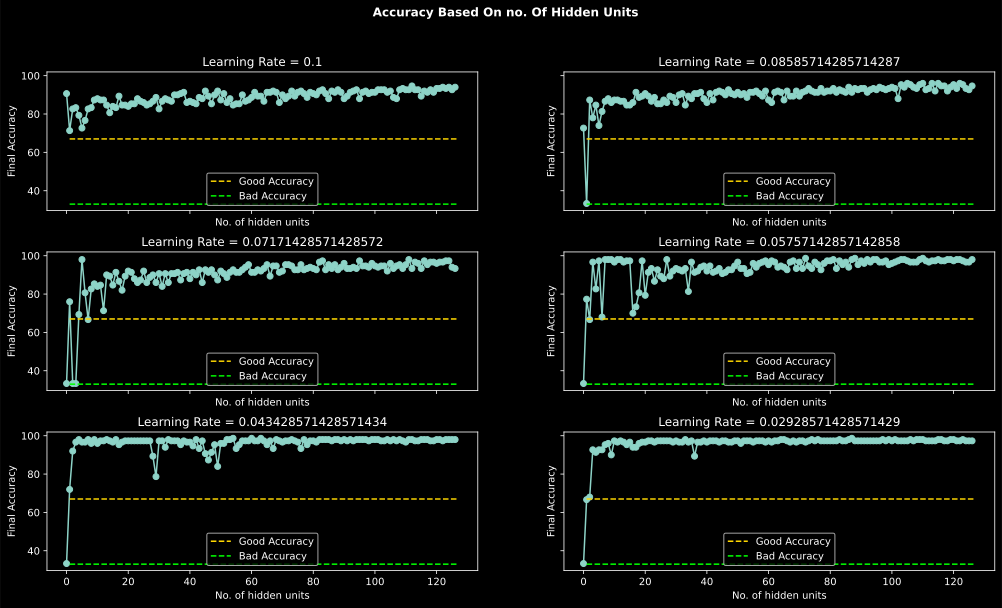

In [86]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(17, 9), sharex=True, sharey=True)

fig.suptitle("Accuracy Based On no. Of Hidden Units", fontweight="bold")

for idx,ax in enumerate(axs.flatten()):
    
    ax.plot(accuracies[idx], "o-");
    ax.plot(hidden_units[[0,-1]], [67,67], "--", color="gold", label="Good Accuracy")
    ax.plot(hidden_units[[0,-1]], [33,33], "--", color="lime", label="Bad Accuracy")
    ax.legend()
    ax.set_title(f"Learning Rate = {learning_rates[idx]}")
    ax.set_xlabel("No. of hidden units");
    ax.set_ylabel("Final Accuracy");

plt.subplots_adjust(hspace=0.3)
# axs[0].set_title("Accuracy based on the number of hidden units")
# axs
# axs[0].plot(accuracies, "o-", color="cyan");
# axs[0].plot(hidden_units[[0,-1]], [67,67], "--", color="gold", label="Good Accuracy")
# axs[0].plot(hidden_units[[0,-1]], [33,33], "--", color="lime", label="Bad Accuracy")
# axs[0].set_xlabel("No. of hidden units");
# axs[0].set_ylabel("Final Accuracy");
# axs[0].legend();

3) With simple models and small datasets, it's possible to test many different parameter settings. However, larger
   models take longer to train, and so running 128 tests is not always feasible. Modify the code to have the number of
   hidden units range from 1 to 128 in steps of 14. Plot the results on top of the results using steps of 1 (that is, 
   show both results in the same graph). Does your interpretation change with fewer experiment runs?

In [13]:
n_epochs = 150

hidden_units = np.arange(1, 128, 1) 
accuracies = []


for n_units in hidden_units:
    
    #crear modelo
    model, loss_func, optim = build_model(n_units)
    
    #entrenar el modelo
    acc = train_model(model)
    
    #almacenar precisión post entrenamiento de cada modelo con n unidades ocultas
    accuracies.append(acc)

In [15]:
n_epochs = 150

accuracies_mod = []


for n_units in xsticks:
    
    #crear modelo
    model, loss_func, optim = build_model(n_units)
    
    #entrenar el modelo
    acc = train_model(model)
    
    #almacenar precisión post entrenamiento de cada modelo con n unidades ocultas
    accuracies_mod.append(acc)

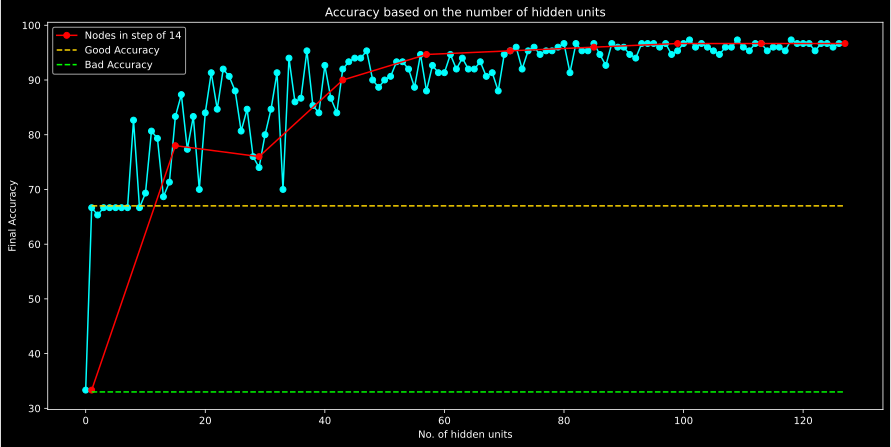

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))

ax.set_title("Accuracy based on the number of hidden units")
ax.plot(accuracies, "o-", color="cyan");
ax.plot(xsticks, accuracies_mod, "ro-", label="Nodes in step of 14")
ax.plot(hidden_units[[0,-1]], [67,67], "--", color="gold", label="Good Accuracy")
ax.plot(hidden_units[[0,-1]], [33,33], "--", color="lime", label="Bad Accuracy")
ax.set_xlabel("No. of hidden units");
ax.set_ylabel("Final Accuracy");
ax.legend();